# [Visualizing Time Series Data in Python](https://www.datacamp.com/completed/statement-of-accomplishment/course/6a12bba59a8353653d0b8278662299c8d9b57a94)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/time_series/visualizing_time_series_data_in_python/notebook.ipynb)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from urllib.request import urlretrieve
from statsmodels.datasets import co2 as co2_dataset, get_rdataset
from statsmodels.graphics import tsaplots


# convert decimal years to dates
def decimal_year_to_date(d):
    year = int(d)
    month = d - year
    month = round(month * 12) + 1
    return datetime(year, month, 1)

In [2]:
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/discoveries.html
discoveries = get_rdataset("discoveries", cache=True).data
discoveries.columns = ["date", "Y"]
discoveries["date"] = pd.to_datetime({"year": discoveries["date"], "month": 1, "day": 1})
discoveries = discoveries.set_index("date")
print(discoveries.head())

            Y
date         
1860-01-01  5
1861-01-01  3
1862-01-01  0
1863-01-01  2
1864-01-01  0


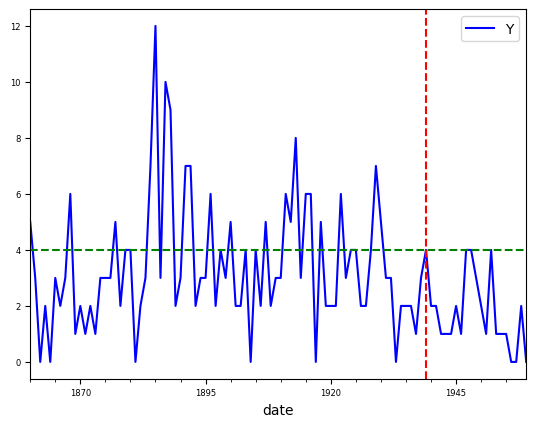

In [3]:
# plot red and green lines
ax = discoveries.plot(color="blue", fontsize=6)
ax.axvline("1939-01-01", color="red", linestyle="--")
ax.axhline(4, color="green", linestyle="--")
plt.show()

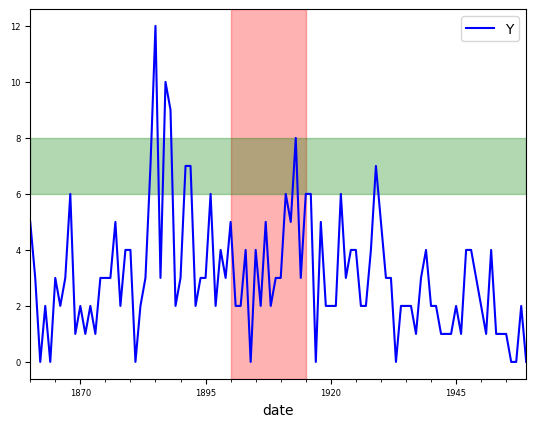

In [4]:
# plot red and green shaded areas
ax = discoveries.plot(color="blue", fontsize=6)
ax.axvspan("1900-01-01", "1915-01-01", color="red", alpha=0.3)
ax.axhspan(6, 8, color="green", alpha=0.3)
plt.show()

Use `isna()` and `notna()` to check for missing values. They return a boolean mask where `True` indicates a missing value. To count missing values, use `sum()`.

> Note that `isnull()` and `notnull()` are aliases.

The `fillna()` method was previously used to fill missing values; now you should use `bfill()` or `ffill()`.

In [5]:
co2 = co2_dataset.load_pandas().data
co2 = co2.bfill()
co2.isnull().sum()

co2    0
dtype: int64

To smooth time series data and analyze trends, use rolling statistics.

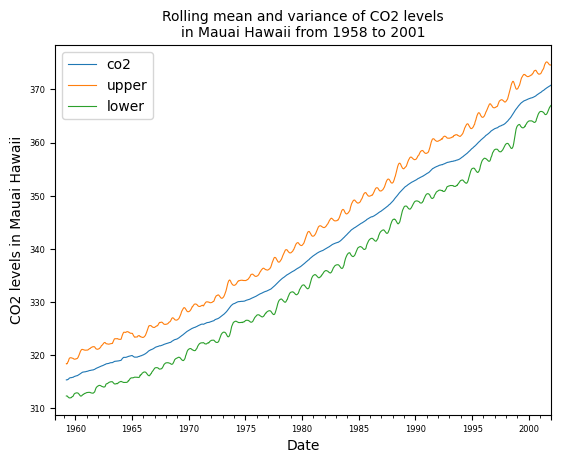

In [6]:
# 52-week moving average and standard deviation
moving_avg = co2.rolling(window=52).mean()
std_dev = co2.rolling(window=52).std()

# upper and lower bounds
moving_avg["upper"] = moving_avg["co2"] + (std_dev["co2"] * 2)
moving_avg["lower"] = moving_avg["co2"] - (std_dev["co2"] * 2)

# plot
ax = moving_avg.plot(fontsize=6, linewidth=0.8)
ax.set_xlabel("Date", fontsize=10)
ax.set_ylabel("CO2 levels in Mauai Hawaii", fontsize=10)
ax.set_title(
    "Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001",
    fontsize=10,
)
plt.show()

To compute aggregate statistics, use `groupby()`.

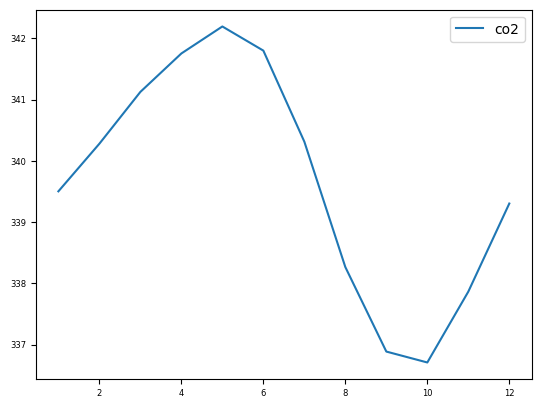

In [7]:
# compute mean co2 for each month of the year
index_month = co2.index.month
mean_co2_by_month = co2.groupby(index_month).mean()

# plot
mean_co2_by_month.plot(fontsize=6)
plt.legend(fontsize=10)
plt.show()

Use `describe()` to get summary statistics.

Use `boxplot()` to visualize the distribution of data and identify outliers. The "whiskers" extend 1.5 times the interquartile range (IQR) from the 1st and 3rd quartiles (or 25th and 75th percentiles).

Histograms are simpler to read than boxplots, but you need to adjust the bins manually. Whereas a density plot is like a smoothed histogram.

In [8]:
print(co2.describe())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000


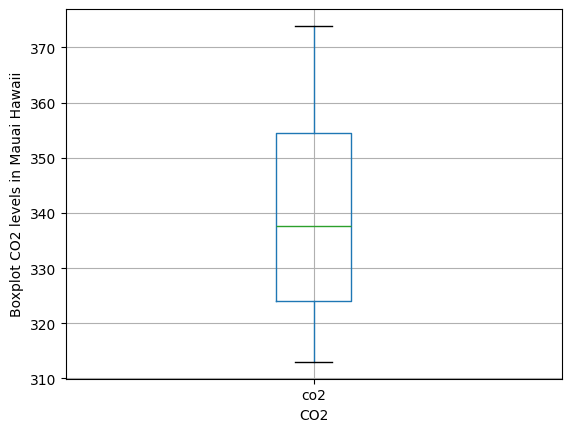

In [9]:
ax = co2.boxplot()
ax.set_xlabel("CO2", fontsize=10)
ax.set_ylabel("Boxplot CO2 levels in Mauai Hawaii", fontsize=10)
plt.show()

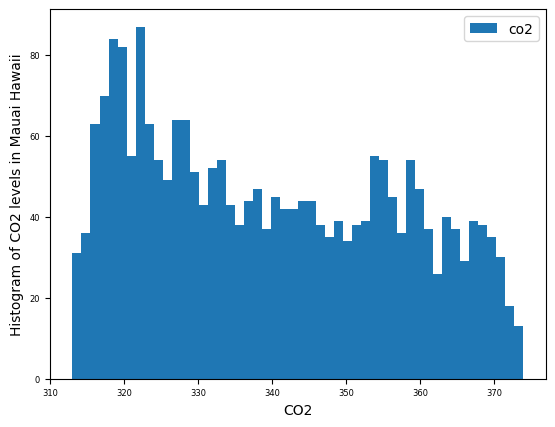

In [10]:
ax = co2.plot(kind="hist", bins=50, fontsize=6)
ax.set_xlabel("CO2", fontsize=10)
ax.set_ylabel("Histogram of CO2 levels in Mauai Hawaii", fontsize=10)
plt.legend(fontsize=10)
plt.show()

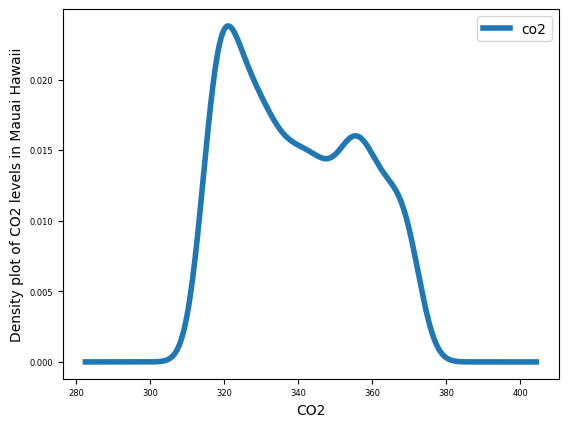

In [11]:
ax = co2.plot(kind="density", linewidth=4, fontsize=6)
ax.set_xlabel("CO2", fontsize=10)
ax.set_ylabel("Density plot of CO2 levels in Mauai Hawaii", fontsize=10)
plt.show()

Autocorrelation is a measure of correlation between your time series and a lagged version of itself; it's used to find repeating patterns.

Statsmodels ("statistical models") has `plot_acf` and `plot_pacf` functions in the `tsaplots` ("time series analysis") module.

Partial autocorrelation removes the influence of intermediary observations to isolate the direct relationship between observations at different lags.

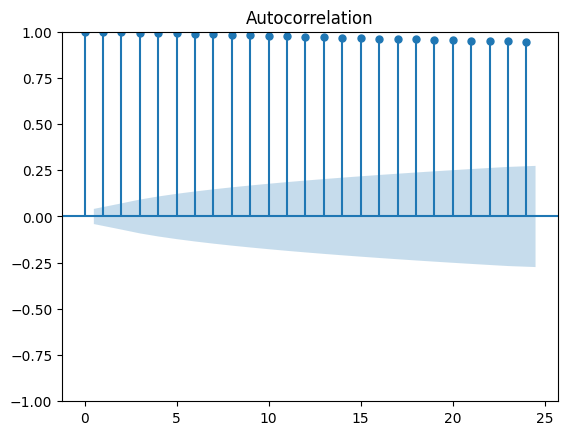

In [12]:
fig = tsaplots.plot_acf(co2["co2"], lags=24)
plt.show()

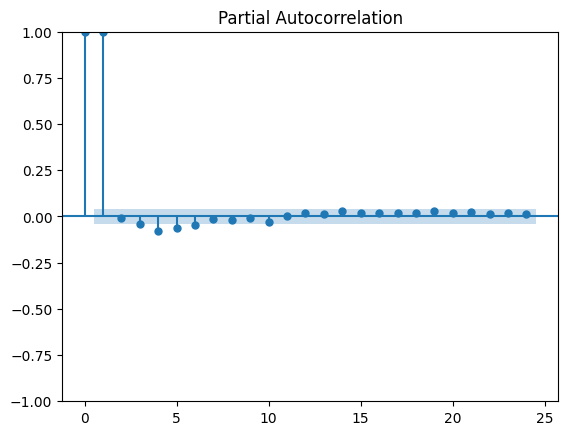

In [13]:
fig = tsaplots.plot_pacf(co2["co2"], lags=24)
plt.show()

Time series can be decomposed into trend, seasonality, and noise components. The `seasonal_decompose` function from `statsmodels` can separate them.

Seasonality describes the periodic signal in the data, while trend indicates if the series is increasing, decreasing, or constant. Noise is the unexplained variance in the data.

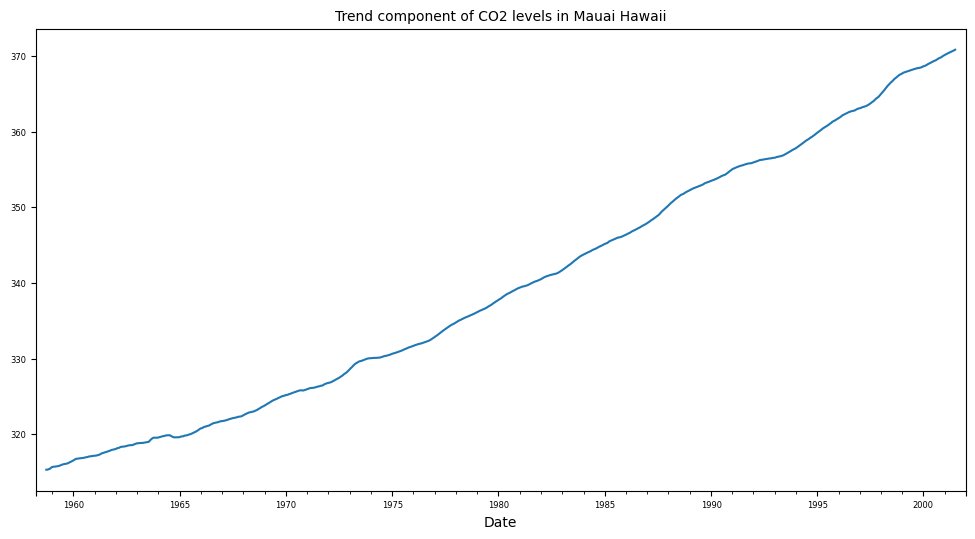

In [14]:
decomposition = sm.tsa.seasonal_decompose(co2["co2"], model="additive")
trend = decomposition.trend
ax = trend.plot(figsize=(12, 6), fontsize=6)
ax.set_xlabel("Date", fontsize=10)
ax.set_title("Trend component of CO2 levels in Mauai Hawaii", fontsize=10)
plt.show()

In [15]:
air_passengers = get_rdataset("AirPassengers", cache=True).data
air_passengers.columns = ["Month", "AirPassengers"]
air_passengers["Month"] = air_passengers["Month"].apply(decimal_year_to_date)
air_passengers.set_index("Month", inplace=True)
air_passengers.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


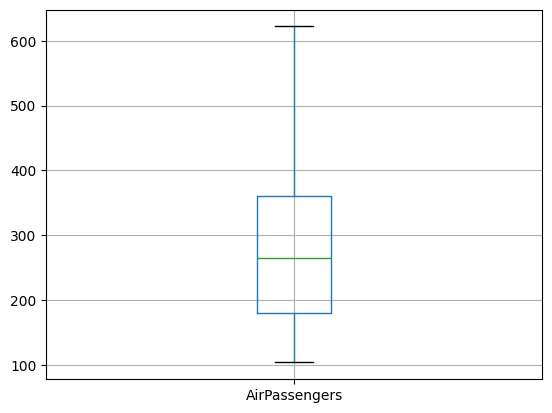

In [16]:
ax = air_passengers.boxplot()
plt.show()

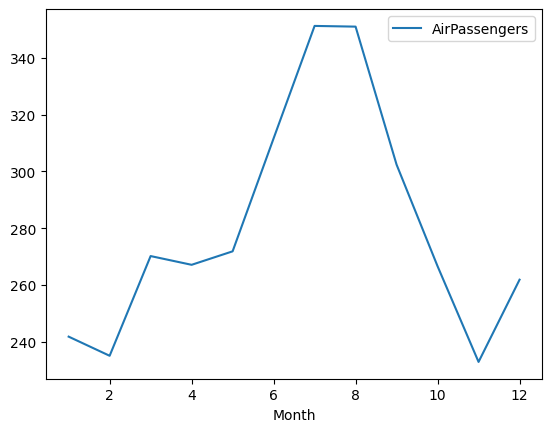

In [17]:
mean_air_passengers_by_month = air_passengers.groupby(air_passengers.index.month).mean()
mean_air_passengers_by_month.plot()
plt.show()

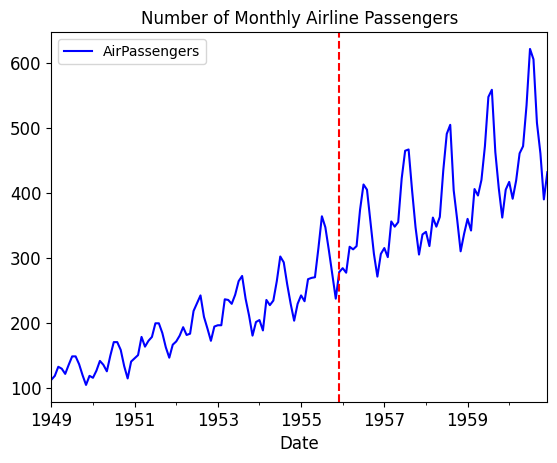

In [18]:
# Plot the time series in your DataFrame
ax = air_passengers.plot(color="blue", fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline("1955-12-01", color="red", linestyle="--")

# Specify the labels in your plot
ax.set_xlabel("Date", fontsize=12)
ax.set_title("Number of Monthly Airline Passengers", fontsize=12)
plt.show()

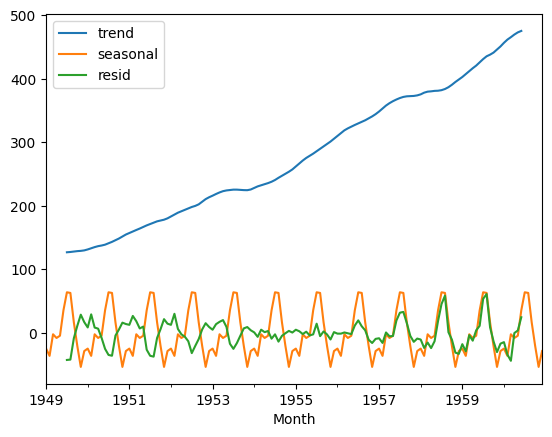

In [19]:
air_passengers_decomposed = sm.tsa.seasonal_decompose(
    air_passengers,
    model="additive",  # multiplicative doesn't work well
)
air_passengers_components = pd.concat(
    [
        air_passengers_decomposed.trend,
        air_passengers_decomposed.seasonal,
        air_passengers_decomposed.resid,
    ],
    axis=1,  # concatenate columns, not rows
)

air_passengers_components.plot()
plt.show()

So far we've worked with "isolated" time series, analyzing them individually. We'll now work with "multiple" time series.

Area plots are useful for showing the contribution of each time series to a cumulative total.

You can add a text table to the plot with `ax.table()` to show tabular data along with the plot.

Subplots are useful for comparing multiple time series, since they can have different scales. When _faceting_ multiple charts, you can align the x and y axes with `sharex` and `sharey`, respectively.

Finally, you can calculate the correlation between multiple time series with the `corr()` method, specifying the Pearson or Spearman method. You can visualize these correlations with a heatmap, and use a clustermap to group similar time series together.

In [20]:
# from https://github.com/yhat/ggpy
meat_url = "https://raw.githubusercontent.com/adamelliotfields/datacamp/main/notebooks/time_series/visualizing_time_series_data_in_python"
meat_csv = "meat.csv"

try:
    meat_file = open(meat_csv)
    meat_file.close()
except FileNotFoundError:
    urlretrieve(meat_url + "/" + meat_csv, meat_csv)

meat = pd.read_csv(meat_csv)
meat["date"] = pd.to_datetime(meat["date"])
meat.set_index("date", inplace=True)
meat.describe()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


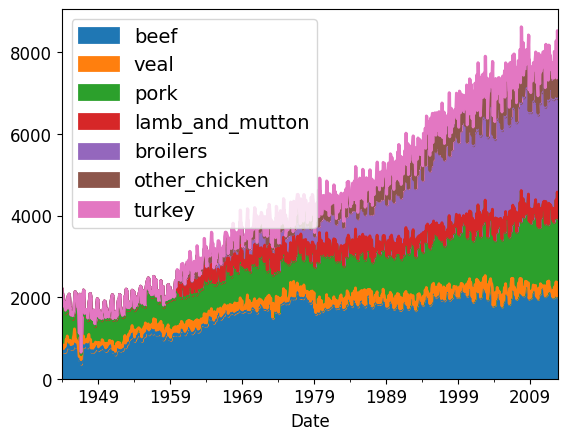

In [21]:
ax = meat.plot.area(linewidth=2, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.legend(fontsize=14)
plt.show()

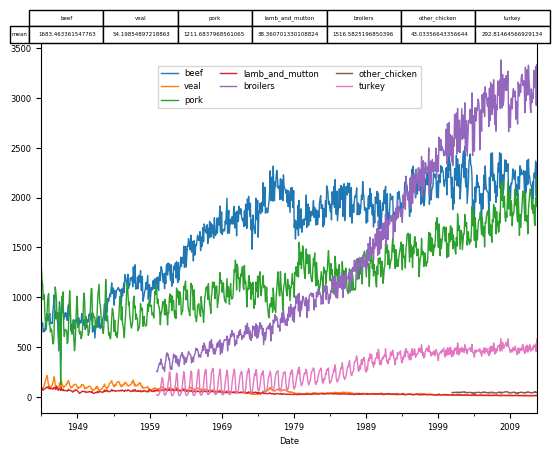

In [22]:
meat_mean = meat.mean().to_frame().T
meat_mean.index = ["mean"]

ax = meat.plot(fontsize=6, linewidth=1)
ax.set_xlabel("Date", fontsize=6)
ax.table(
    cellText=meat_mean.values,
    colWidths=[0.15] * len(meat_mean.columns),
    rowLabels=meat_mean.index.values,
    colLabels=meat_mean.columns,
    loc="top",
)
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 0.95),
    ncol=3,
    fontsize=6,
)
plt.show()

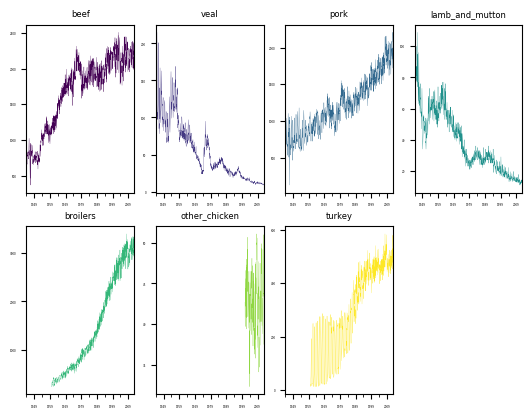

In [23]:
meat.plot(
    subplots=True,
    layout=(2, 4),
    sharex=False,
    sharey=False,
    colormap="viridis",
    fontsize=2,
    legend=False,
    linewidth=0.2,
)

# set a title for each subplot
for ax, title in zip(
    plt.gcf().axes,  # get current figure
    meat.columns,
):
    ax.set_title(title, fontsize=6)

# remove x axis labels
for ax in plt.gcf().axes:
    ax.set_xlabel("")

plt.show()

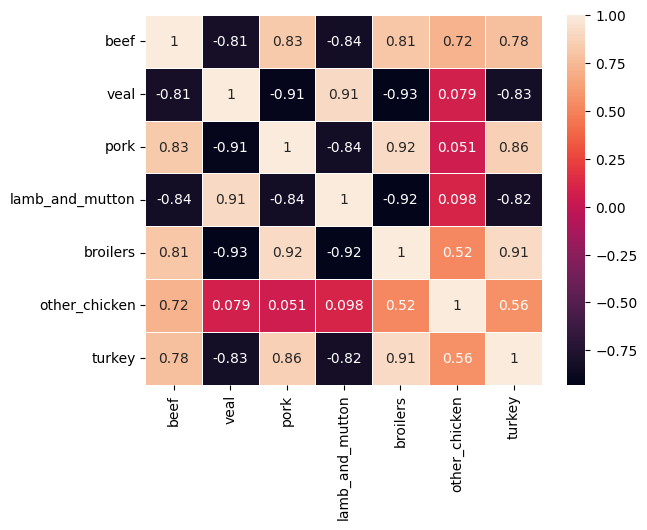

In [24]:
meat_corr = meat.corr(method="spearman")
sns.heatmap(meat_corr, linewidths=0.4, annot=True, annot_kws={"size": 10})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

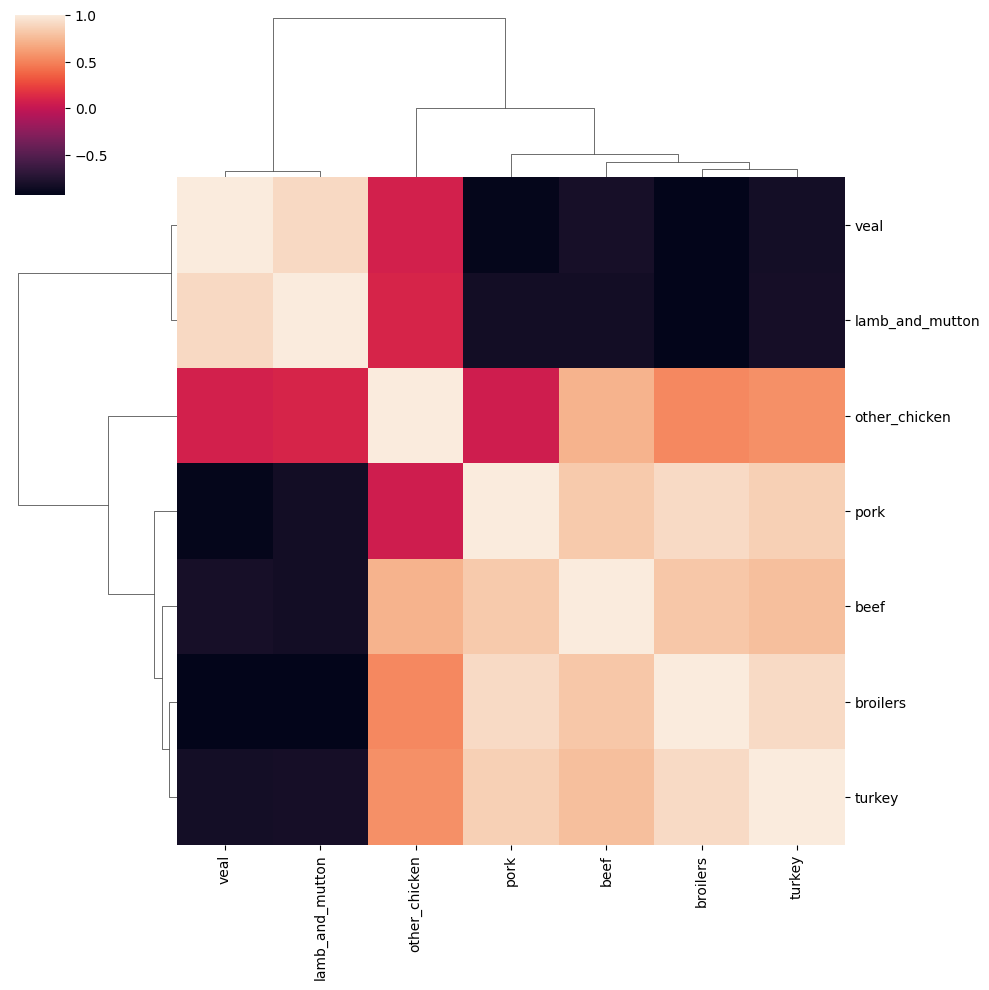

In [25]:
fig = sns.clustermap(meat_corr, row_cluster=True, col_cluster=True, figsize=(10, 10))
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [26]:
# unemployment data from 2000 to 2010
unemployment_url = "https://raw.githubusercontent.com/adamelliotfields/datacamp/main/notebooks/time_series/visualizing_time_series_data_in_python"
unemployment_csv = "unemployment.csv"

try:
    unemployment_file = open(unemployment_csv)
    unemployment_file.close()
except FileNotFoundError:
    urlretrieve(unemployment_url + "/" + unemployment_csv, unemployment_csv)

unemployment = pd.read_csv(unemployment_csv)
unemployment["datestamp"] = pd.to_datetime(unemployment["datestamp"])
unemployment.set_index("datestamp", inplace=True)
unemployment.describe()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


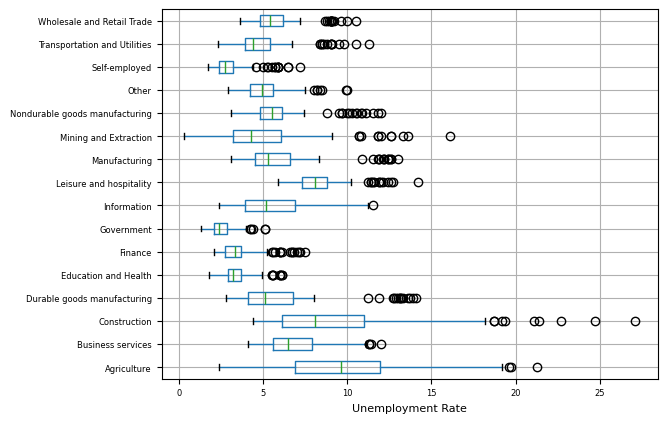

In [27]:
ax = unemployment.boxplot(fontsize=6, vert=False)
ax.set_xlabel("Unemployment Rate", fontsize=8)
plt.show()

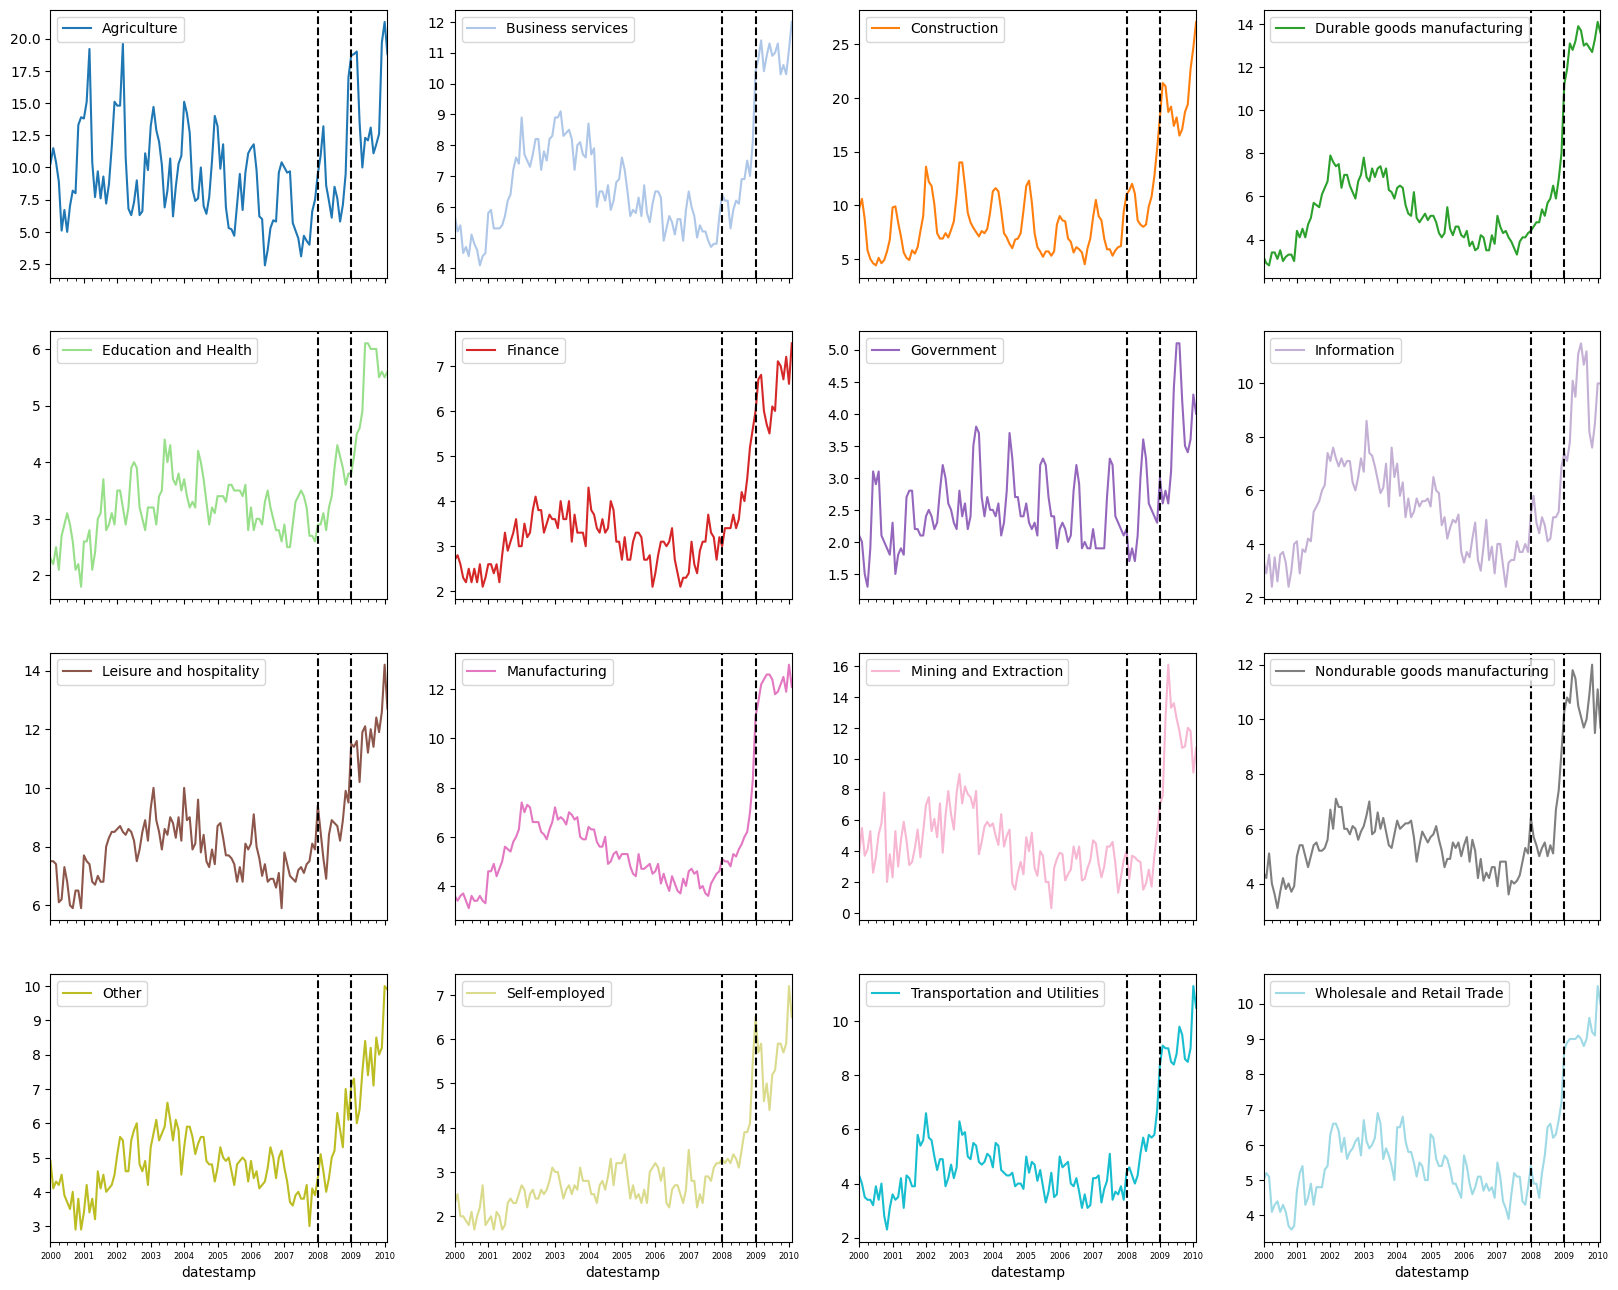

In [28]:
axes = unemployment.plot(
    subplots=True,
    layout=(4, 4),  # 16 subplots
    figsize=(20, 16),
    sharex=True,
    sharey=False,
    colormap="tab20",
)

# make x-axis labels smaller
for axis in axes.flatten():
    axis.axvline("2008-01-01", color="black", linestyle="--")
    axis.axvline("2009-01-01", color="black", linestyle="--")
    axis.tick_params(axis="x", labelsize=6)

plt.show()

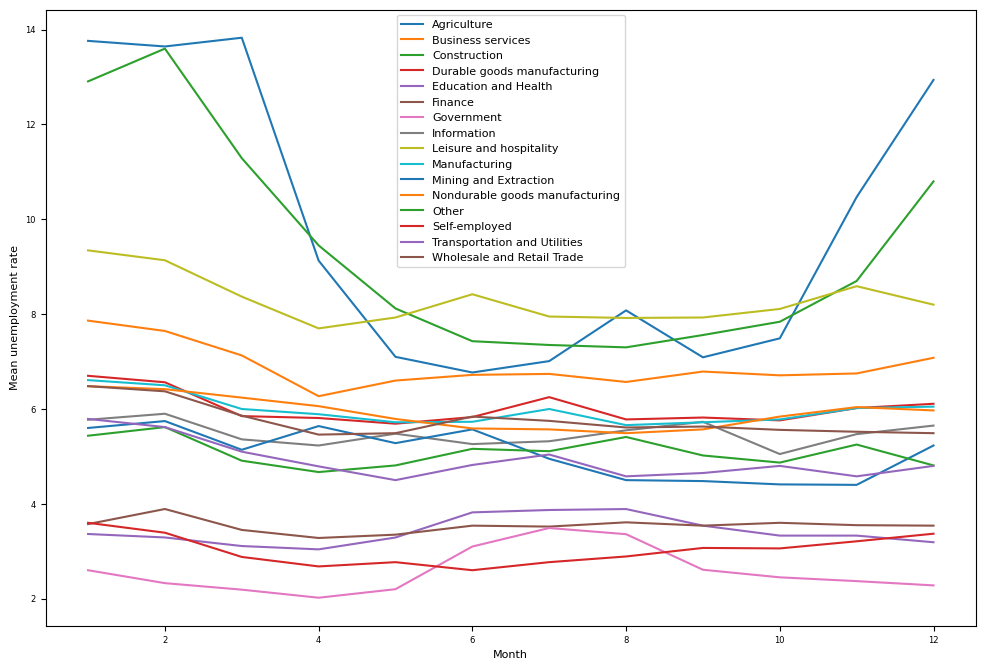

In [29]:
unemployment_index_month = unemployment.index.month
mean_unemployment_by_month = unemployment.groupby(unemployment_index_month).mean()
ax = mean_unemployment_by_month.plot(fontsize=6, figsize=(12, 8))
ax.set_xlabel("Month", fontsize=8)
ax.set_ylabel("Mean unemployment rate", fontsize=8)
plt.legend(fontsize=8, loc="upper center")
plt.show()

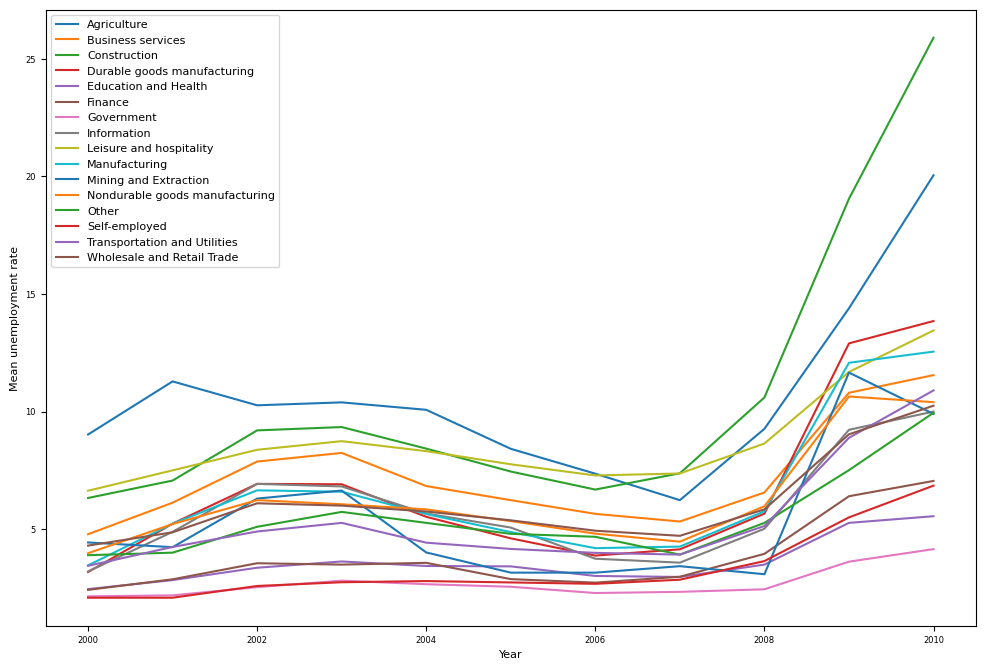

In [30]:
unemployment_index_year = unemployment.index.year
mean_unemployment_by_year = unemployment.groupby(unemployment_index_year).mean()
ax = mean_unemployment_by_year.plot(fontsize=6, figsize=(12, 8))
ax.set_xlabel("Year", fontsize=8)
ax.set_ylabel("Mean unemployment rate", fontsize=8)
plt.legend(fontsize=8, loc="upper left")
plt.show()

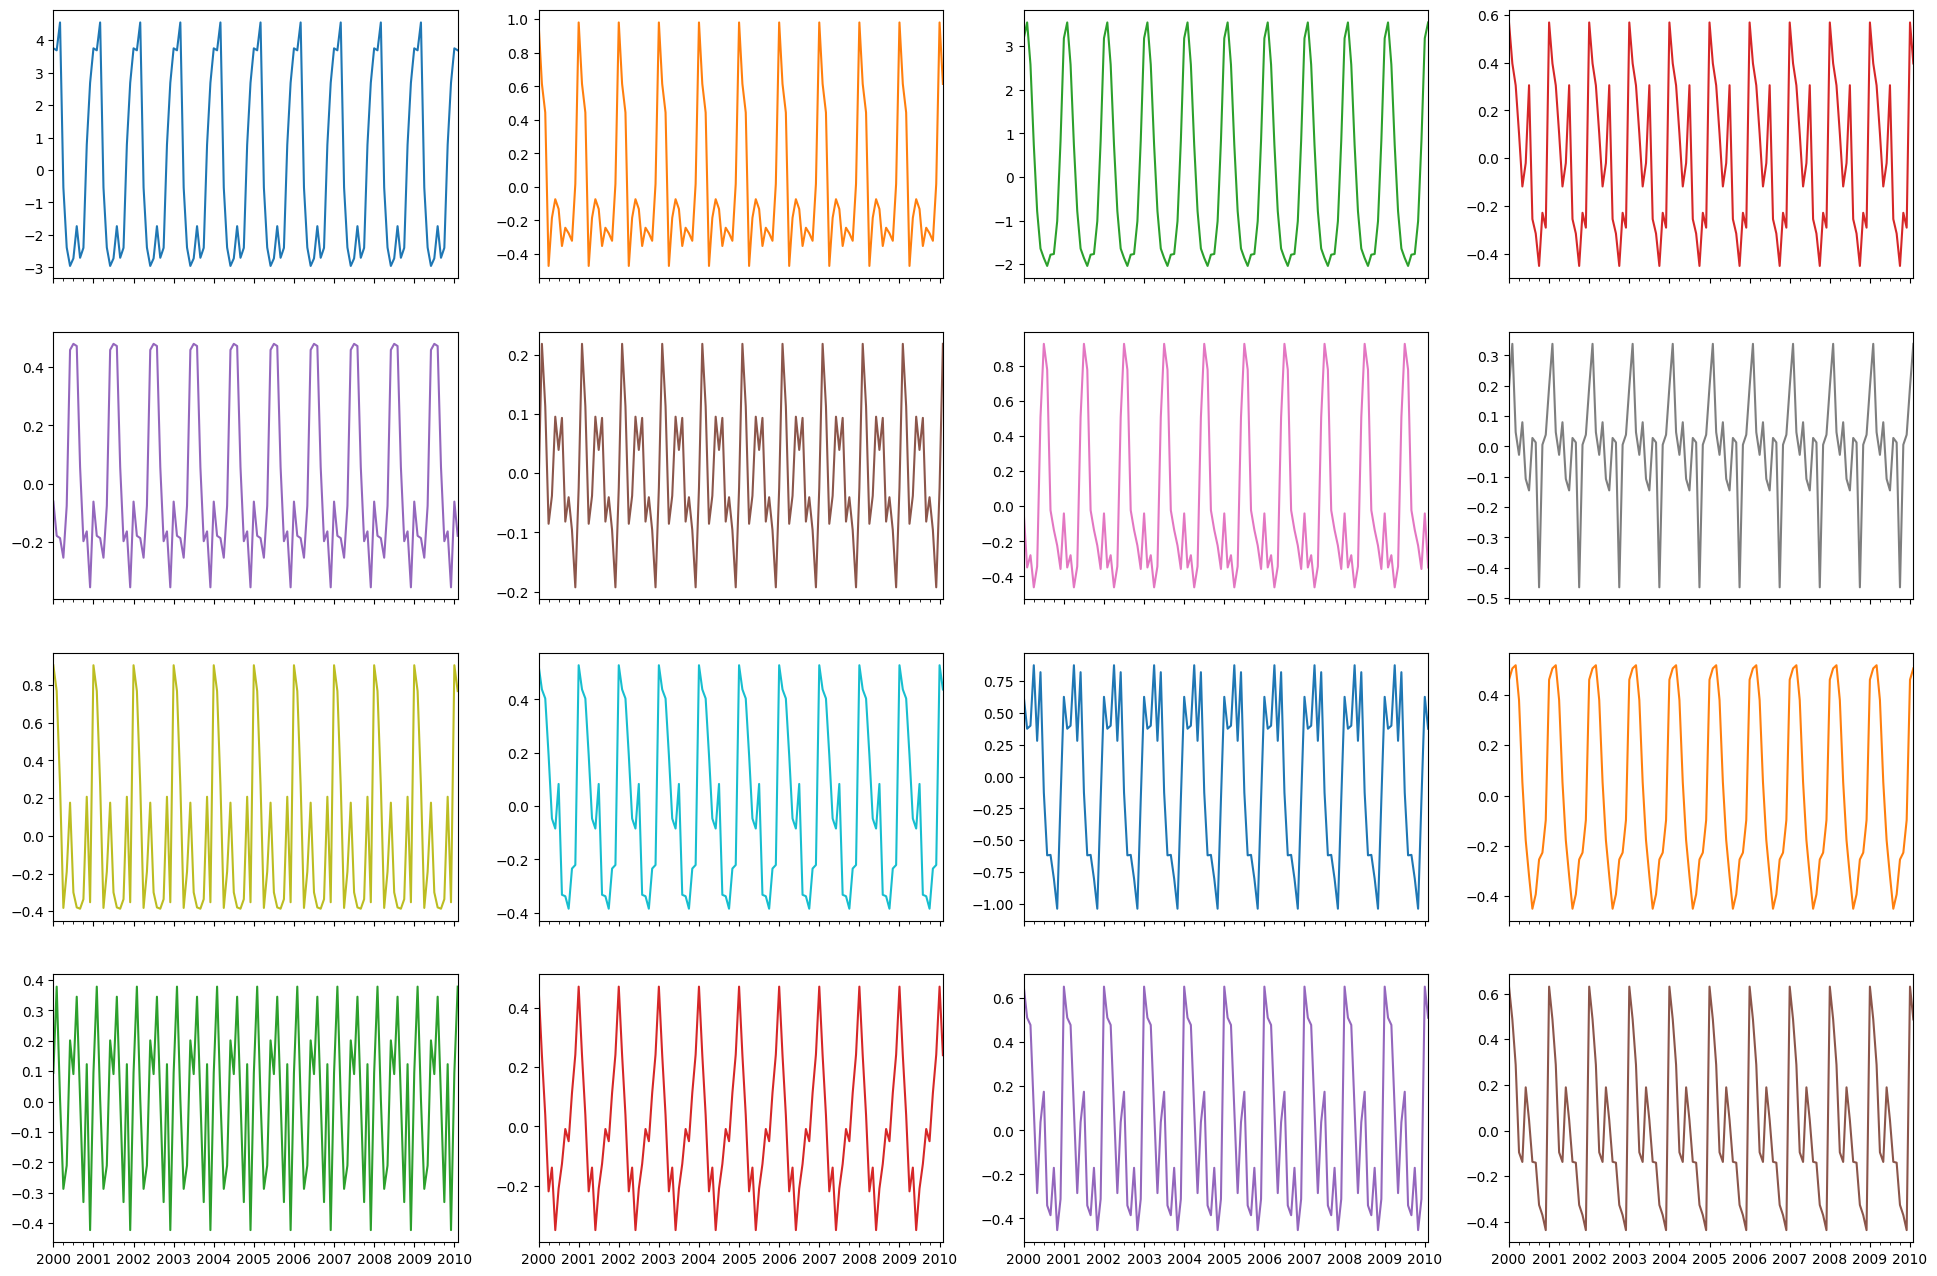

In [31]:
# extract the seasonal values for the decomposition of each time series
unemployment_seasonal = {}
for column in unemployment.columns:
    unemployment_seasonal[column] = sm.tsa.seasonal_decompose(unemployment[column]).seasonal

# create dataframe and remove index label
seasonality_df = pd.DataFrame.from_dict(unemployment_seasonal)
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(
    subplots=True,
    layout=(4, 4),
    figsize=(24, 16),
    sharex=True,
    sharey=False,
    legend=False,
)

# Show plot
plt.show()

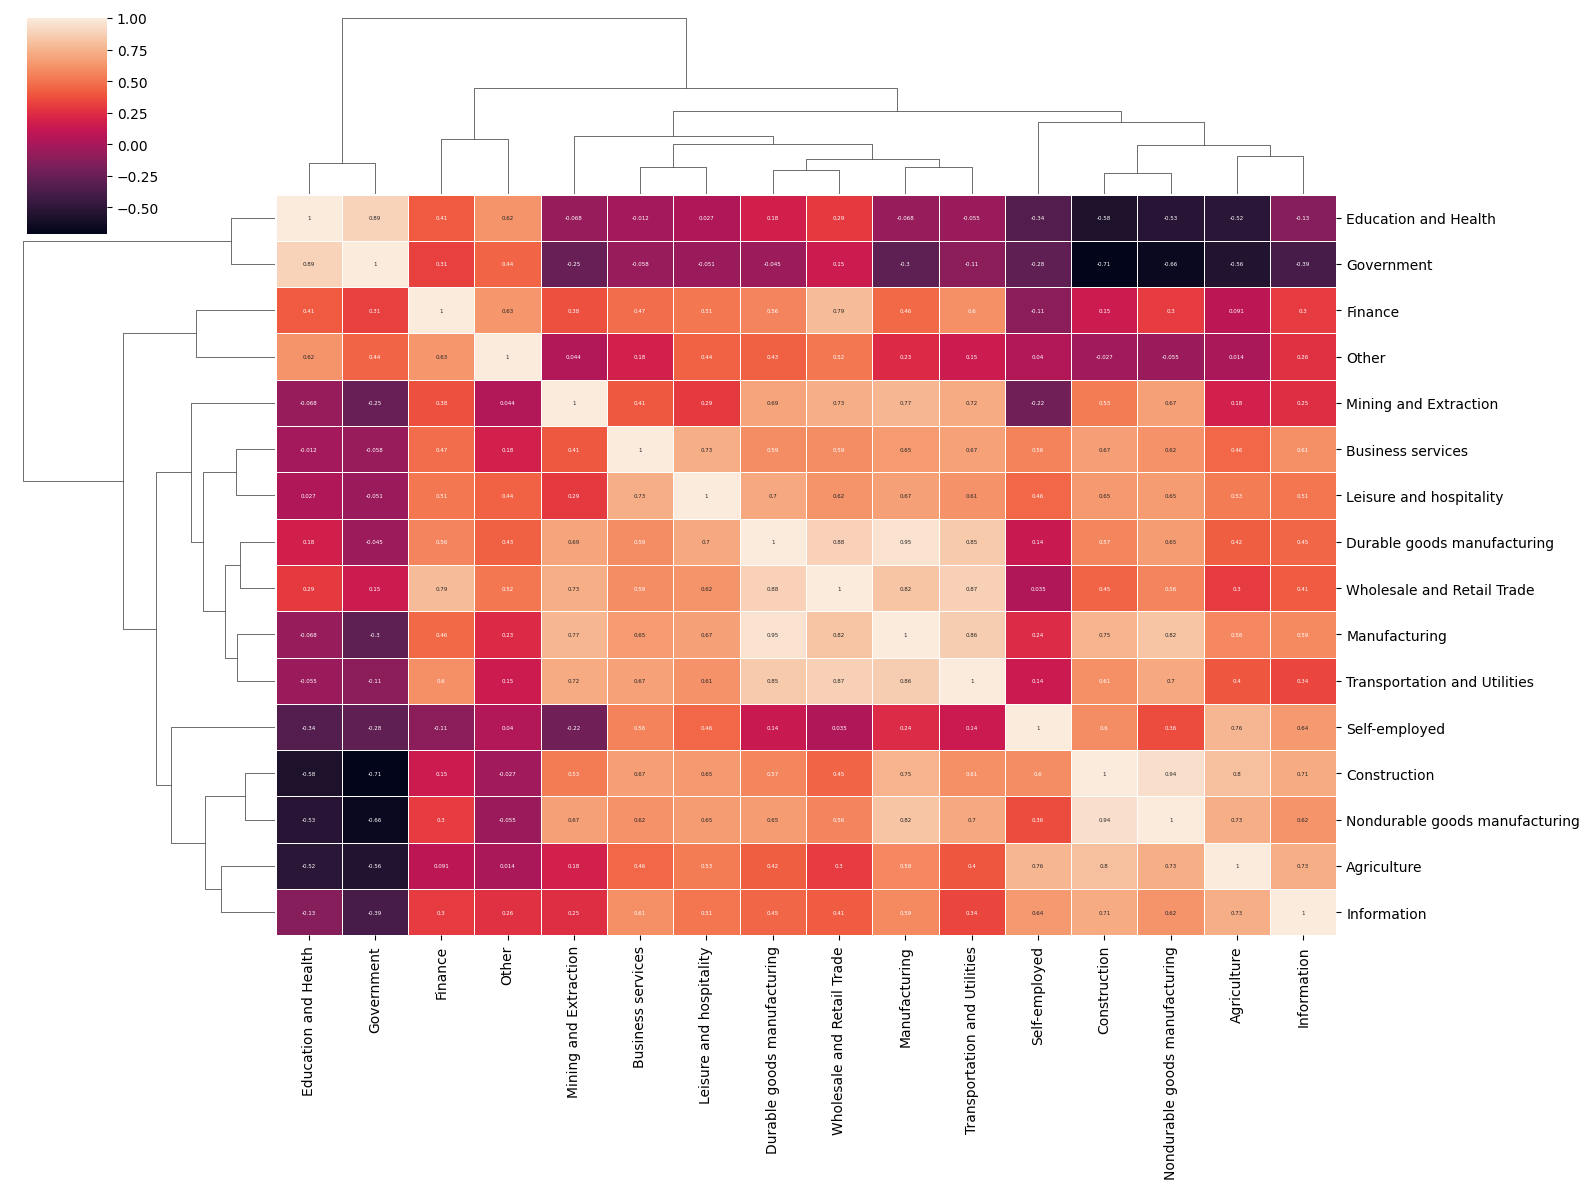

In [32]:
seasonality_corr = seasonality_df.corr(method="spearman")
fig = sns.clustermap(
    seasonality_corr,
    annot=True,
    annot_kws={"size": 4},
    linewidths=0.4,
    figsize=(16, 12),
)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()